In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [3]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke

from sklearn import datasets

def load_digits():
    digits = datasets.load_digits()
    return digits


In [4]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)

digits = load_digits()

print(digits.target_names)
print(digits.feature_names)

[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
import pandas as pd

# print(digits.data.shape)
# print(digits.data[:13])

digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
print(digits_df.head())

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5   
0        0.0        0.0        5.0       13.0        9.0        1.0  \
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7   
0        0.0        0.0        0.0        0.0  ...        0.0        0.0  \
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5   
0        0.0        0.0        6.0       13.0

In [6]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters:int, random_state:int, digits) -> (KMeans, np.ndarray):
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = model.fit_predict(digits.data)
    return model, clusters

# print(predict(n_clusters=10, random_state=0, digits=digits))


In [7]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.

model, clusters = predict(n_clusters=10, random_state=0, digits=digits)
print(model.cluster_centers_.shape)


(10, 64)


C:\Egyetem\bevadat\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


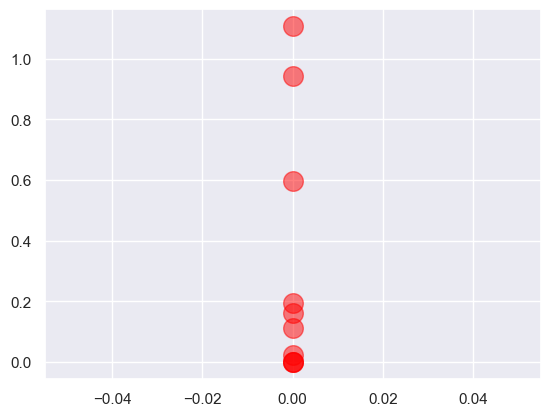

In [8]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [9]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters: np.ndarray, digits) -> np.ndarray:
    result = np.zeros(len(clusters))
    for i in range(10):
        mask = (clusters == i)
        subarray = digits.target[mask]
        label = mode(subarray)[0][0]
        result[mask] = label
    return result

predicted_labels = get_labels(clusters=clusters, digits=digits)
print(predicted_labels)

[0. 8. 8. ... 8. 9. 9.]


C:\Users\konko\AppData\Local\Temp\ipykernel_15712\63003125.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(subarray)[0][0]


In [10]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

def calc_accuracy(target_labels: np.ndarray, predicted_labels: np.ndarray):
    accuracy = accuracy_score(target_labels, predicted_labels)
    return round(accuracy, 2)

print(calc_accuracy(target_labels=digits.target, predicted_labels=clusters))

0.02


C:\Users\konko\AppData\Local\Temp\ipykernel_15712\63003125.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(subarray)[0][0]


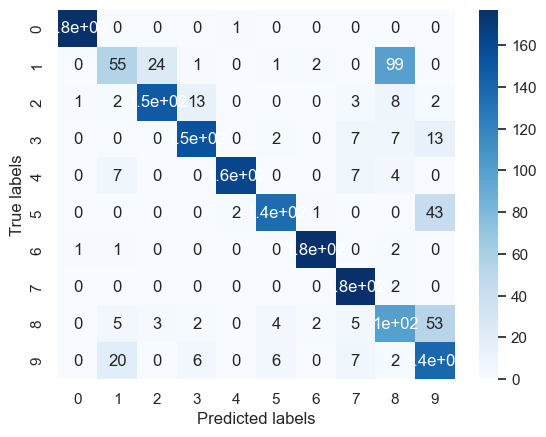

In [11]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

target_labels = digits.target
predicted_labels = get_labels(clusters, digits)
cf_matrix = confusion_matrix(target_labels, predicted_labels)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
